In [18]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt

In [42]:
import sklearn
print(sklearn.__version__)

1.8.0


In [20]:
df=pd.read_csv("/workspaces/Crop-Yield-Prediction/crop_yield_prediction_with_weather.csv", index_col="Unnamed: 0").reset_index(drop=True)

In [21]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,lat,lon,avg_temp,total_precip,total_snow
0,Albania,Maize,1990,36613,1485,121.0,41.000028,19.999962,14.74,658.7,21.98
1,Albania,Potatoes,1990,66667,1485,121.0,41.000028,19.999962,14.74,658.7,21.98
2,Albania,"Rice, paddy",1990,23333,1485,121.0,41.000028,19.999962,14.74,658.7,21.98
3,Albania,Sorghum,1990,12500,1485,121.0,41.000028,19.999962,14.74,658.7,21.98
4,Albania,Soybeans,1990,7000,1485,121.0,41.000028,19.999962,14.74,658.7,21.98


In [22]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

In [23]:
load_dotenv()

DB_NAME = os.getenv("MYSQL_DATABASE")
DB_USER = os.getenv("MYSQL_USER")
DB_PASSWORD = os.getenv("MYSQL_PASSWORD")
DB_HOST = "127.0.0.1"
DB_PORT = 3306

In [24]:
engine = create_engine(
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

In [25]:
df.to_sql(
    name="crop_yield_prediction_with_weather_data",
    con=engine,
    if_exists="replace",
    index=False
)

print("✅ Data loaded from .env and written to MySQL")

✅ Data loaded from .env and written to MySQL


In [26]:
# Hər bir sütundakı boş dəyərlərin sayı
print(df.isnull().sum())

Area                                 0
Item                                 0
Year                                 0
hg/ha_yield                          0
average_rain_fall_mm_per_year        0
pesticides_tonnes                    0
lat                                  0
lon                                  0
avg_temp                         15144
total_precip                     15144
total_snow                       15144
dtype: int64


In [27]:
# SELECT year, AVG(yield) AS average_yield
# FROM crop_yield_data
# GROUP BY year
# ORDER BY year;

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   lat                            28242 non-null  float64
 7   lon                            28242 non-null  float64
 8   avg_temp                       13098 non-null  float64
 9   total_precip                   13098 non-null  float64
 10  total_snow                     13098 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.4+ MB


In [29]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,lat,lon,avg_temp,total_precip,total_snow
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000,13098.000000,13098.000000,13098.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,15.284326,18.063165,18.697792,1435.648030,22.411699
std,7.051905,84956.612897,709.81215,59958.784665,23.732050,71.019621,8.528348,1742.404602,52.551200
min,1990.000000,50.000000,51.00000,0.040000,-41.500083,-107.991707,-7.860000,0.000000,0.000000
25%,1995.000000,19919.250000,593.00000,1702.000000,-2.483383,-53.200000,11.260000,537.300000,0.000000
50%,2001.000000,38295.000000,1083.00000,17529.440000,22.351115,24.991639,22.230000,1143.200000,0.000000
75%,2008.000000,104676.750000,1668.00000,48687.880000,30.330840,78.667743,25.340000,1665.500000,26.880000
max,2013.000000,501412.000000,3240.00000,367778.000000,63.246778,172.834408,28.740000,18111.000000,572.740000


In [30]:
df.isnull().sum()

Area                                 0
Item                                 0
Year                                 0
hg/ha_yield                          0
average_rain_fall_mm_per_year        0
pesticides_tonnes                    0
lat                                  0
lon                                  0
avg_temp                         15144
total_precip                     15144
total_snow                       15144
dtype: int64

In [31]:
df = df.dropna(subset=[
    'hg/ha_yield',
    'avg_temp',
    'total_precip',
    'average_rain_fall_mm_per_year'
])

In [32]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
lat                              0
lon                              0
avg_temp                         0
total_precip                     0
total_snow                       0
dtype: int64

In [33]:
df['Year'] = df['Year'].astype(int)
df['hg/ha_yield'] = df['hg/ha_yield'].astype(float)
df['avg_temp'] = df['avg_temp'].astype(float)
df['total_precip'] = df['total_precip'].astype(float)
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(float)

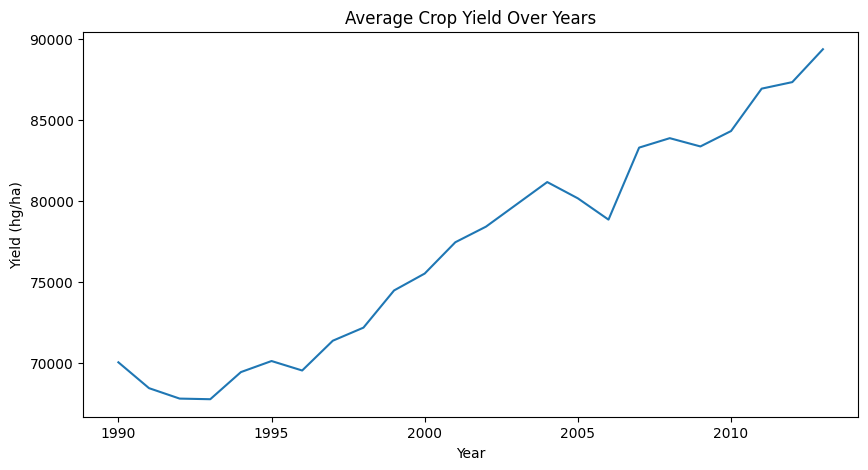

In [34]:
trend = df.groupby('Year')['hg/ha_yield'].mean()

plt.figure(figsize=(10,5))
plt.plot(trend.index, trend.values)
plt.title('Average Crop Yield Over Years')
plt.xlabel('Year')
plt.ylabel('Yield (hg/ha)')
plt.show()

<Axes: title={'center': 'Average Crop Yield Over Years'}, xlabel='Year', ylabel='Yield (hg/ha)'>

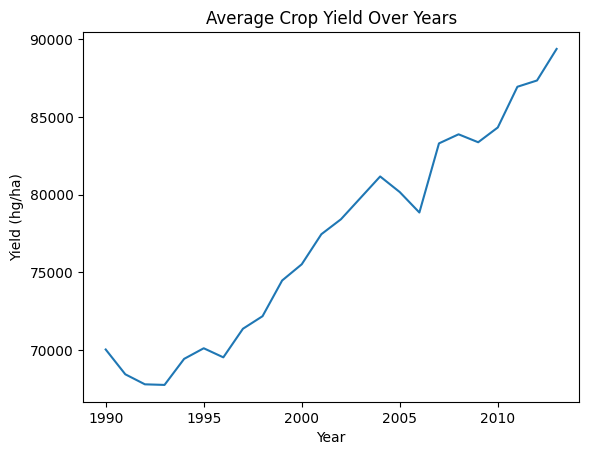

In [35]:
trend = df.groupby('Year')['hg/ha_yield'].mean()

trend.plot(
    title='Average Crop Yield Over Years',
    ylabel='Yield (hg/ha)',
    xlabel='Year'
)


<Axes: title={'center': 'Temperature vs Yield'}, xlabel='avg_temp', ylabel='hg/ha_yield'>

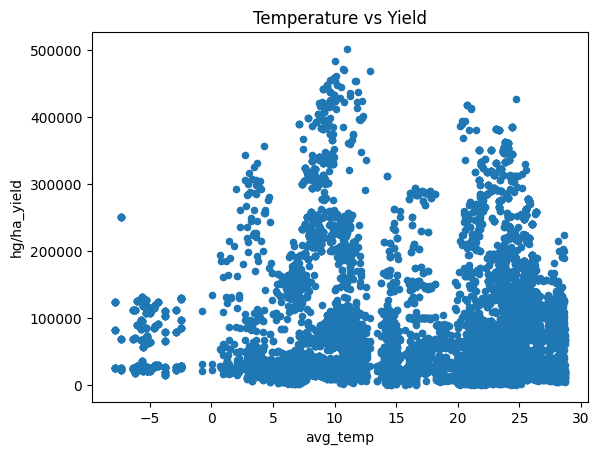

In [36]:
df.plot.scatter(
    x='avg_temp',
    y='hg/ha_yield',
    title='Temperature vs Yield'
)

In [38]:
country_yield = df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False)

country_yield.head(10)

Area
Belgium    216468.461538
Denmark    214033.020000
Ireland    197913.695652
Bahrain    153237.551724
Germany    143631.344444
Finland    135670.136364
Japan      128851.875776
Jamaica    122347.869565
France     114424.768116
Egypt      114375.304348
Name: hg/ha_yield, dtype: float64

In [40]:
X = df[
    [
        'avg_temp',
        'total_precip',
        'average_rain_fall_mm_per_year',
        'pesticides_tonnes'
    ]
]

y = df['hg/ha_yield']


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [45]:
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 6633611344.990808
R2 Score: 0.036180861787027174


In [47]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients

,Feature,Coefficient
0,avg_temp,-1116.130105
1,total_precip,-4.968332
2,average_rain_fall_mm_per_year,1.495383
3,pesticides_tonnes,0.103311
